# Connect Four AI

Wassup! I have no idea what I'm doing, but here goes.

So I _finally_ coded up a working Connect Four game in Python, and now comes the fun part. I'm going to follow the style of the tutorial on Medium and start with a simple Q-table implementation.

In [1]:
from ConnectFour import Game
import numpy as np

g = Game()
g.play(0) # player 1 move
g.play(0) # player 2 move
g.play(1) # and back to player 1

(array([[[ 1.,  1.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]]]), 0, False)

Above is a sample output of what the computer gets for each move: a "reward" (only nonzero when you win/lose), the state of the board, and an indication of whether the game is over or not.

## Constructing the Neural Network

In [3]:
from ConnectFour import Game
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

g = Game()

# constructing the network
tf.reset_default_graph()
inputs1 = tf.placeholder(shape=[1,84], dtype=tf.float32) # the input is the current state, i.e. the entire board
W = tf.Variable(tf.random_uniform([84,7], 0, 0.1)) # the weights for a single layer network are this
Qout = tf.matmul(inputs1, W) # predicting Q values using network
predict = tf.argmax(Qout, 1) # finding best predicted action from Qout

# constructing the loss function
nextQ = tf.placeholder(shape=[1,7], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

# some magic initializer or something
init = tf.global_variables_initializer()

# hyperparameters
y = 0.99 # discount rate for Bellman equation
e = 0.1 # chance of random action being taken
n_episodes = 2000

jList = [] # number of steps for each game
rList = [] # maximum reward for each game

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(n_episodes):
        if i%100 is 0:
            print('On episode {}'.format(i))
        
        # reset the game
        g.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            s = g.getState()
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1:s.reshape((1,84))})
            if np.random.rand(1) < e:
                a[0] = np.random.randint(7) # pick a random move
            # make the move, get the reward and whatnot
            while True: # ensures it makes a move
                try:
                    s1, r, d = g.play(a[0])
                    break
                except:
                    # first check if game is still playable
                    if g.isPlayable():
                        a[0] = np.random.randint(7)
                    else:
                        s1 = s
                        r = 0
                        d = True
                        break
            Q1 = sess.run(Qout, {inputs1:s1.reshape((1,84))})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            # not sure why it's 0, a[0] here... Wait, I think it's because
            # targetQ is 1x7 vector, and only want to update the Q value for
            # the given state/action pair
            targetQ[0, a[0]] = r + y*maxQ1
            # train model based on new value
            _, W1 = sess.run([updateModel, W], {inputs1: s.reshape((1,84)), nextQ: targetQ})
            rAll += r
            
            if d:
                e = 1. / ((i/50.) + 10)
                break
        
        jList.append(j)
        rList.append(rAll)

print('Percent successful episodes: {}%'.format(sum(rList)/n_episodes * 100))

On episode 0
On episode 100
On episode 200
On episode 300
On episode 400
On episode 500
On episode 600
On episode 700
On episode 800
On episode 900
On episode 1000
On episode 1100
On episode 1200
On episode 1300
On episode 1400
On episode 1500
On episode 1600
On episode 1700
On episode 1800
On episode 1900
Percent successful episodes: 98.35000000000001%


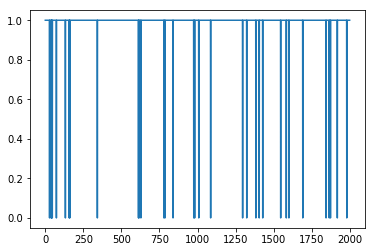

In [7]:
plt.plot(rList)

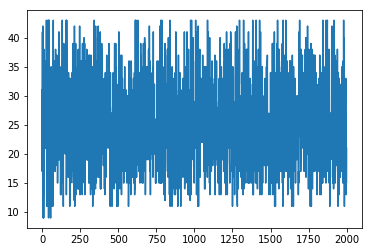

In [6]:
plt.plot(jList)

### So... What did I just do?

I'm not really sure, but the computer did run 2000 episodes of Connect Four and (possibly) trained the Q-network to play. I'm not really sure how to test it, and I've got to run to practice now, but I'll return to this when I get back.